<a href="https://colab.research.google.com/github/dhcryan/data_science_note/blob/main/%EB%8D%B0%EC%82%AC%EB%85%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀


In [ ]:
import pandas as pd
file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/insurance.csv'
data=pd.read_csv(file_url)

In [ ]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [ ]:
round(data.describe(),2)

,age,sex,bmi,children,smoker,charges
count,1338.00,1338.00,1338.00,1338.00,1338.0,1338.00
mean,39.21,0.51,30.66,1.09,0.2,13270.42
std,14.05,0.50,6.10,1.21,0.4,12110.01
min,18.00,0.00,15.96,0.00,0.0,1121.87
25%,27.00,0.00,26.30,0.00,0.0,4740.29
50%,39.00,1.00,30.40,1.00,0.0,9382.03
75%,51.00,1.00,34.69,2.00,0.0,16639.91
max,64.00,1.00,53.13,5.00,1.0,63770.43


In [ ]:
X=data[['age','sex','bmi','children','smoker']]
y=data['charges']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
#학습시킨다. 독립변수와 종속변수 간의 관계를 분석하여 새로운 데이터를 예측할 수 있는 
#상태로 만든다.
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#학습때 사용한 독립변수를 가진데이터
pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred,squared=False)


6079.92387495849

In [ ]:
model.score(X_train,y_train)

0.7451406102785639

In [ ]:
model.coef_

array([  263.74889226,   -73.91369665,   312.83393135,   556.7748556 ,
       23788.93295778])

In [ ]:
model.intercept_

-12122.91390598233

In [ ]:
pd.Series(model.coef_,index=X.columns)

age           263.748892
sex           -73.913697
bmi           312.833931
children      556.774856
smoker      23788.932958
dtype: float64

# 로지스틱 회귀

In [ ]:
# 타이타닉 승객 정보를 활용하여 생존 여부를 예측한다.

In [ ]:
import pandas as pd
file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/titanic.csv'
data=pd.read_csv(file_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    889 non-null    int64  
 1   Name      889 non-null    object 
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Ticket    889 non-null    object 
 7   Embarked  889 non-null    object 
 8   Survived  889 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 62.6+ KB


In [ ]:
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Embarked,Survived
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,S,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C,1
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,S,1
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,S,1
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,S,0


In [ ]:
round(data.describe(),2)

,Pclass,Age,SibSp,Parch,Survived
count,889.00,889.00,889.00,889.00,889.00
mean,2.31,29.32,0.52,0.38,0.38
std,0.83,12.98,1.10,0.81,0.49
min,1.00,0.42,0.00,0.00,0.00
25%,2.00,22.00,0.00,0.00,0.00
50%,3.00,28.00,0.00,0.00,0.00
75%,3.00,35.00,1.00,0.00,1.00
max,3.00,80.00,8.00,6.00,1.00


In [ ]:
data.corr()

,Pclass,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.336512,0.081656,0.016824,-0.335549
Age,-0.336512,1.000000,-0.232543,-0.171485,-0.069822
SibSp,0.081656,-0.232543,1.000000,0.414542,-0.034040
Parch,0.016824,-0.171485,0.414542,1.000000,0.083151
Survived,-0.335549,-0.069822,-0.034040,0.083151,1.000000


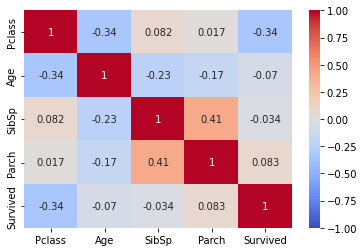

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(),cmap='coolwarm',vmin=-1,vmax=1,annot=True)
plt.show()

In [ ]:
#name이랑 ticket은 너무 많다 이거야
data=data.drop(['Name','Ticket'],axis=1)

In [ ]:
data=pd.get_dummies(data,columns=['Sex','Embarked'],drop_first=True)

In [ ]:
data.head()

,Pclass,Age,SibSp,Parch,Survived,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,0,1,0,1
1,1,38.0,1,0,1,0,0,0
2,3,26.0,0,0,1,0,0,1
3,1,35.0,1,0,1,0,0,1
4,3,35.0,0,0,0,1,0,1


Q,S가 모두 0이면 EMBARKED_C에 해당하는 거

더미 변수에서 고유값 개수보다 하나를 덜 사용해도 구분하는 데 문제가 없음

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)

머신러닝 평가 지표: accuracy_score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)


0.8370786516853933

In [ ]:
model.coef_

array([[-1.12211051, -0.03901822, -0.30649676, -0.10686071, -2.53605153,
         0.03489663, -0.22612322]])

In [ ]:
pd.Series(model.coef_[0],index=X.columns)

Pclass       -1.122111
Age          -0.039018
SibSp        -0.306497
Parch        -0.106861
Sex_male     -2.536052
Embarked_Q    0.034897
Embarked_S   -0.226123
dtype: float64

In [ ]:
data['Family']=data['SibSp']+data['Parch']
data.drop(['SibSp','Parch'],axis=1,inplace=True)
data.head()

,Pclass,Age,Survived,Sex_male,Embarked_Q,Embarked_S,Family
0,3,22.0,0,1,0,1,1
1,1,38.0,1,0,0,0,1
2,3,26.0,1,0,0,1,0
3,1,35.0,1,0,0,1,1
4,3,35.0,0,1,0,1,0


In [ ]:
X=data.drop('Survived',axis=1)
y=data['Survived']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=200)
model=LogisticRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
accuracy_score(y_test,pred)

0.8314606741573034

# KNN(K-nearest neighbors)


In [ ]:
# 알코올, 말산, 마그네슘, 색조 등이 독립변수, 와인 등급인 class가 종속변수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/wine.csv'
data=pd.read_csv(file_url)
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,NaN,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       176 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          173 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  class

In [ ]:
round(data.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,176.00,178.00,178.00,178.00,178.00,178.00,178.00,173.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,12.99,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89,0.94
std,0.80,1.12,0.27,3.34,14.28,0.63,1.00,0.13,0.57,2.32,0.23,0.71,314.91,0.78
min,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00,0.00
25%,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.26,1.25,3.22,0.78,1.94,500.50,0.00
50%,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50,1.00
75%,13.67,3.08,2.56,21.50,107.00,2.80,2.88,0.45,1.95,6.20,1.12,3.17,985.00,2.00
max,14.75,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00,2.00


목표 변수가 어떤 값들로 구성되어 있는지는 다음과 같은 방법을 통해 확인

In [ ]:
data['class'].unique()

array([0, 1, 2])

클래스별로 고유값들이 몇 개 있는지 확인한다.

In [ ]:
data['class'].value_counts()

1    71
0    59
2    48
Name: class, dtype: int64

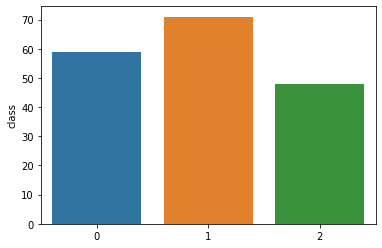

In [ ]:
sns.barplot(x=data['class'].value_counts().index,y=data['class'].value_counts())

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


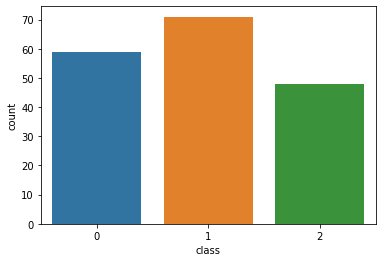

In [ ]:
sns.countplot(data['class'])

결측치 개수 확인

In [ ]:
data.isna().sum()

alcohol                         2
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            5
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
class                           0
dtype: int64

결측치의 비율 확인

In [ ]:
data.isna().mean()

alcohol                         0.011236
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028090
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

결측치 처리하기

In [ ]:
data.dropna()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.dropna(subset=['alcohol']).isna().mean()


alcohol                         0.000000
malic_acid                      0.000000
ash                             0.000000
alcalinity_of_ash               0.000000
magnesium                       0.000000
total_phenols                   0.000000
flavanoids                      0.000000
nonflavanoid_phenols            0.028409
proanthocyanins                 0.000000
color_intensity                 0.000000
hue                             0.000000
od280/od315_of_diluted_wines    0.000000
proline                         0.000000
class                           0.000000
dtype: float64

In [ ]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

결측치가 있는 열을 지워버리기

In [ ]:
data.drop(['alcohol','nonflavanoid_phenols'],axis=1)

,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,1.71,2.43,15.6,127,2.80,3.06,2.29,5.64,1.04,3.92,1065,0
2,2.36,2.67,18.6,101,2.80,3.24,2.81,5.68,1.03,3.17,1185,0
3,1.95,2.50,16.8,113,3.85,3.49,2.18,7.80,0.86,3.45,1480,0
4,2.59,2.87,21.0,118,2.80,2.69,1.82,4.32,1.04,2.93,735,0
5,1.76,2.45,15.2,112,3.27,3.39,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...
173,5.65,2.45,20.5,95,1.68,0.61,1.06,7.70,0.64,1.74,740,2
174,3.91,2.48,23.0,102,1.80,0.75,1.41,7.30,0.70,1.56,750,2
175,4.28,2.26,20.0,120,1.59,0.69,1.35,10.20,0.59,1.56,835,2
176,2.59,2.37,20.0,120,1.65,0.68,1.46,9.30,0.60,1.62,840,2


결측값 채우기

In [ ]:
data.fillna(-99)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [ ]:
data.fillna(data.median(),inplace=True) #중앙값으로 결측치 채우기

In [ ]:
data.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
class                           0.0
dtype: float64

##Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

###표준화 스케일링

In [ ]:
st_scaler=StandardScaler()
st_scaler.fit(data)
#학습에서 얻은 정보로 데이터를 변환, scaling
st_scaled=st_scaler.transform(data)

In [ ]:
#numpy 배열
st_scaled
#pandas 데이터로 보기 좋게 정렬
import pandas as pd
st_scaled=pd.DataFrame(st_scaled,columns=data.columns)

In [ ]:
round(st_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.50,-1.43,-3.68,-2.71,-2.16,-2.09,-1.67,-1.85,-2.07,-1.66,-2.07,-1.87,-1.48,-1.21
25%,-0.81,-0.67,-0.52,-0.71,-0.84,-0.89,-0.87,-0.78,-0.62,-0.79,-0.79,-0.95,-0.77,-1.21
50%,0.04,-0.43,-0.05,-0.02,-0.11,0.02,0.11,-0.19,-0.04,-0.14,0.06,0.25,-0.23,0.07
75%,0.84,0.70,0.72,0.59,0.59,0.82,0.86,0.69,0.65,0.49,0.70,0.80,0.76,1.35
max,2.18,3.05,3.12,3.16,3.77,2.54,3.04,2.35,3.53,3.39,3.26,1.96,2.95,1.35


### Robust scaling

In [ ]:
rb_scaler=RobustScaler()
rb_scaled=rb_scaler.fit_transform(data)
rb_scaled=pd.DataFrame(rb_scaled)
round(rb_scaled.describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,-0.03,0.31,0.04,0.01,0.08,-0.01,-0.06,0.13,0.03,0.11,-0.04,-0.14,0.15,-0.03
std,0.61,0.73,0.81,0.77,0.70,0.59,0.58,0.68,0.79,0.78,0.67,0.57,0.66,0.39
min,-1.54,-0.73,-2.94,-2.07,-1.44,-1.23,-1.03,-1.14,-1.60,-1.18,-1.42,-1.21,-0.81,-0.50
25%,-0.52,-0.18,-0.38,-0.53,-0.51,-0.53,-0.56,-0.41,-0.46,-0.51,-0.57,-0.69,-0.35,-0.50
50%,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.48,0.82,0.62,0.47,0.49,0.47,0.44,0.59,0.54,0.49,0.43,0.31,0.65,0.50
max,1.29,2.54,2.56,2.44,2.72,1.48,1.70,1.73,2.81,2.74,2.14,0.98,2.08,0.50


### min-max scaler

In [ ]:
mm_scaler=MinMaxScaler()
mm_scaled=mm_scaler.fit_transform(data)
mm_scaled=pd.DataFrame(mm_scaled,columns=data.columns)
round(mm_scaled.describe(),2)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00,171.00
mean,0.53,0.32,0.54,0.46,0.36,0.45,0.35,0.44,0.37,0.33,0.39,0.49,0.33,0.47
std,0.21,0.22,0.15,0.17,0.17,0.22,0.21,0.24,0.18,0.20,0.19,0.26,0.23,0.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.36,0.17,0.47,0.34,0.22,0.26,0.17,0.25,0.26,0.17,0.24,0.24,0.16,0.00
50%,0.54,0.22,0.53,0.46,0.35,0.46,0.38,0.40,0.36,0.30,0.40,0.55,0.28,0.50
75%,0.71,0.48,0.65,0.56,0.46,0.63,0.54,0.60,0.49,0.43,0.52,0.70,0.50,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### 스케일링 적용하기

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('class',axis=1),data['class'],test_size=0.2,random_state=100)

In [ ]:
m_scaler=MinMaxScaler()
X_train_scaled=m_scaler.fit_transform(X_train)
X_test_scaled=m_scaler.transform(X_test)
X_train_scaled

array([[0.40053763, 0.33399209, 0.43315508, ..., 0.30172414, 0.55311355,
        0.03352354],
       [0.26075269, 0.53162055, 0.34224599, ..., 0.32758621, 0.65201465,
        0.20399429],
       [0.31451613, 0.45256917, 0.51336898, ..., 0.09482759, 0.20512821,
        0.16547789],
       ...,
       [0.36021505, 0.08498024, 0.29946524, ..., 0.49137931, 0.80952381,
        0.16547789],
       [0.66397849, 0.21146245, 0.6684492 , ..., 0.49137931, 0.93406593,
        0.40442225],
       [0.54301075, 0.17786561, 0.43315508, ..., 0.45689655, 0.57875458,
        0.54707561]])

**모델링 및 예측/평가하기**

알고리즘의 속성을 KNN으로 부여한 뒤에 fit으로 학습시키고 predict로 예측까지 완료

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8888888888888888

In [ ]:
pred
#len(pred)

array([1, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2])

**hyperparameter tuning**

n_neighbors

In [ ]:
scores=[]
for i in range(1,21):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_scaled,y_train)
  pred=knn.predict(X_test_scaled)
  acc=accuracy_score(y_test,pred)
  scores.append(acc)

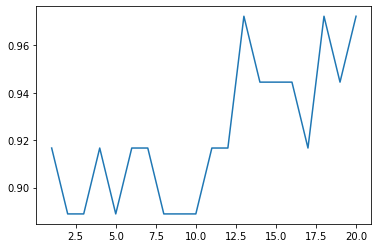

In [ ]:
sns.lineplot(x=range(1,21),y=scores)
#13에서 제일 높음을 확인할 수 있음

In [ ]:
knn=KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled,y_train)
pred=knn.predict(X_test_scaled)
acc=accuracy_score(y_test,pred)

# Naive Bayes

**문자 데이터셋을 활용한 스팸 여부 판단**

In [ ]:
# 알코올, 말산, 마그네슘, 색조 등이 독립변수, 와인 등급인 class가 종속변수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/spam.csv'
data=pd.read_csv(file_url)
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data['target'].nunique()

2

## 전처리 : 특수 기호 제거하기(delete noise)

문자를 하나씩 꺼내서 특수 기호를 제외하고 리스트에 저장한 뒤에 한 문자열을 하나의 행에 저장

In [ ]:
# 특수 기호 확인
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
sample_string=data['text'].loc[0]
sample_string

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
def remove_punc(x):
      # 특수 기호 제외한 문자들을 리스트의 형태로 모아준다.
    new_string=[]
    for i in x:
      if i not in string.punctuation:
        new_string.append(i)
    new_string=''.join(new_string)
    return new_string

In [ ]:
#다음과 같이 할 경우 한 행의 모든 문자가 합쳐진 형태이다.
remove_punc(data['text'])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'sU dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives around here thoughFreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcvEven my brother is not like to speak with me. They treat me like aids patent.As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends CallertuneWINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.Had your mobile 11 months or more? U R entitl

In [ ]:
# apply함수를 사용해 pandas series 형태에 적용
data['text']=data['text'].apply(remove_punc)

## 전처리 : 불용어 제거하기 (delete stopwords)

문자열을 단어 단위의 리스트로 변환한 뒤에 불용어가 아닌 것을 소문자로 저장하고 한 문자열로 합친다.

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

In [ ]:
# 제공되는 언어의 불용어
print(stopwords.fileids())
# 한국어 불용어 : https://www.ranks.nl/stopwords/korean

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [ ]:
def stop_words(x):
  new_string=[]
  for i in x.split():
    if i.lower() not in stopwords.words('english'):
      new_string.append(i.lower())
  new_string=' '.join(new_string)
  return new_string
data['text']=data['text'].apply(stop_words)

In [ ]:
data['text']

목표 칼럼 형태 변경

In [ ]:
data['target']=data['target'].map({'spam':1,'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

count 기반 vector화

문자를 개수 기반으로 벡터화

In [ ]:
x=data['text']
y=data['target']
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
# cv.fit(x) #학습하기
#객체에 들어있는 모든 단어에 대한 index 확인
# cv.vocabulary_

In [ ]:
x=cv.fit_transform(x)
print(x)

In [ ]:
data.loc[0]['text']
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


## 모델링 및 예측 평가

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

**MultinomialNB 모듈**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix
model=MultinomialNB()
model.fit(x_train,y_train)
pred=model.predict(x_test)
# 정확도 확인
accuracy_score(y_test,pred)

0.9856502242152466

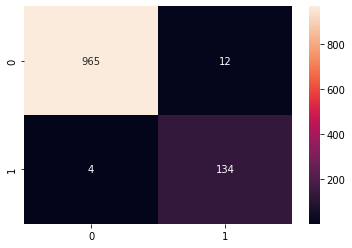

In [ ]:
# confusion matrix(오차 행렬)
sns.heatmap(confusion_matrix(y_test,pred),annot=True,fmt='.0f')
#양성이 spam(1)

* **false positive(Type 1 error)** : 실제 음성인 것을 양성으로 잘못 예측, 스팸의 경우 중요 문자 못 받을 수 있어 문제가 심각해짐

* **false negative(Type 2 error)**: 실제 양성인 것을 음성으로 잘못 예측, 암 예측의 경우 문제가 심각해짐

# Decision Tree



*   데이터에 있는 규칙을 학습을 통해 찾아내 트리 기반의 분류를 한다.
*   독립변수: 학력, 교육 연수, 혼인 상태, 직업
*   종속변수: class



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/salary.csv'
data=pd.read_csv(file_url,skipinitialspace=True)
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   education       48842 non-null  object
 3   education-num   48842 non-null  int64 
 4   marital-status  48842 non-null  object
 5   occupation      46033 non-null  object
 6   relationship    48842 non-null  object
 7   race            48842 non-null  object
 8   sex             48842 non-null  object
 9   capital-gain    48842 non-null  int64 
 10  capital-loss    48842 non-null  int64 
 11  hours-per-week  48842 non-null  int64 
 12  native-country  47985 non-null  object
 13  class           48842 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


unique,top,freq 행은 object행을 위한 것

반대로 object형 변수들은 mean,std같은 기존의 통계정보가 모두 NaN

In [ ]:
data.describe(include='all')

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,48842.000000,46043,48842,48842.000000,48842,46033,48842,48842,48842,48842.000000,48842.000000,48842.000000,47985,48842.000000
unique,NaN,8,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,NaN
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,NaN
freq,NaN,33906,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,NaN
mean,38.643585,NaN,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,0.239282
std,13.710510,NaN,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,0.426649
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,0.000000
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,0.000000
75%,48.000000,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,0.000000


## 전처리 : 범주형 데이터


In [ ]:
data['class']=data['class'].map({'<=50K':0,'>50K':1}) # 숫자로 변환

In [ ]:
# Object형 변수 정보 확인하기
obj_list=[]
for i in data.columns:
    if data[i].dtype=='object':
        obj_list.append(i)

In [ ]:
# 변수 이름과 고윳값 개수 확인
for i in obj_list:
  print(i,data[i].nunique())

workclass 8
education 16
marital-status 7
occupation 14
relationship 6
race 5
sex 2
native-country 41


범주형 변수를 다룰 때는 더미 변수로 바꾸어 활용하는 것이 좋음

웬만하면 변수 수를 줄여야함

In [ ]:
data['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [ ]:
#education_num 을 통해 서열화
np.sort(data['education-num'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [ ]:
# 모든 숫자에 대해 확인하여 고윳값별 educaiton의 고윳값 확인
for i in np.sort(data['education-num'].unique()):
    print(i,data[data['education-num']==i]['education'].unique())

1 ['Preschool']
2 ['1st-4th']
3 ['5th-6th']
4 ['7th-8th']
5 ['9th']
6 ['10th']
7 ['11th']
8 ['12th']
9 ['HS-grad']
10 ['Some-college']
11 ['Assoc-voc']
12 ['Assoc-acdm']
13 ['Bachelors']
14 ['Masters']
15 ['Prof-school']
16 ['Doctorate']


낮은 숫자부터 높은 숫자까지 고학력순으로 나열되어 있음

따라서 그냥 education 열은 지워버

In [ ]:
data.drop('education',axis=1,inplace=True)

In [ ]:
data['occupation'].value_counts()
# 이 정도면 더미 변수로 처리 가능

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                             46
Ecuador                     

보니까 데이터가 너무 많다...어떻게 할건데?



1.   미국이랑 다른 나라로 간소화 but 정보가 줄어든다.
2.   대륙별로 class에 대한 평균을 확인해봤을 때 종속변수의 값이 유사하다면 묶어주면 됨



나라별로 데이터들의 평균값구하고 종속변수 순으로 정렬해보기

In [ ]:
data.groupby('native-country').mean().sort_values('class')

,age,education-num,capital-gain,capital-loss,hours-per-week,class
native-country,,,,,,
Holand-Netherlands,32.000000,10.000000,0.000000,2205.000000,40.000000,0.000000
Guatemala,32.090909,6.306818,167.875000,18.113636,38.715909,0.034091
Outlying-US(Guam-USVI-etc),38.826087,10.043478,0.000000,76.608696,41.347826,0.043478
Columbia,39.458824,9.258824,125.364706,65.247059,39.929412,0.047059
Dominican-Republic,37.970874,7.320388,1064.456311,39.029126,41.621359,0.048544
Mexico,33.635121,6.026288,415.954784,32.656151,40.213460,0.049422
Nicaragua,36.285714,9.000000,138.653061,69.938776,36.938776,0.061224
El-Salvador,33.380645,6.722581,392.761290,36.367742,36.361290,0.070968
Trinadad&Tobago,39.259259,8.962963,116.185185,156.518519,38.888889,0.074074


대륙별로도 차이가 크고 나라별로도 차이가 변동성이 있음->더미 변수 사용하지 않고 변수를 그대로 유지해야 함

트리 기반의 모델에서는 연속된 숫자들도 연속적으로 받아들일 수 있다.

In [ ]:
country_group=data.groupby('native-country').mean()['class'].reset_index()
#그룹별 class의 평균값

In [ ]:
country_group
#이 값들을 토대로 나라를 구분할 것이다.참고로 merge할 때 둘다 class를 갖고 있으니 체크 해야됨

,native-country,class
0,Cambodia,0.321429
1,Canada,0.346154
2,China,0.295082
3,Columbia,0.047059
4,Cuba,0.246377
5,Dominican-Republic,0.048544
6,Ecuador,0.133333
7,El-Salvador,0.070968
8,England,0.370079
9,France,0.421053


In [ ]:
data=data.merge(country_group,on='native-country',how='left')

In [ ]:
data.head()
#class x랑 class y가 생겼다.native-country 삭제하고 , class_x를 class로 변경, class_y를 native_country로 변경

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class_x,class_y
0,25,Private,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0.243977
1,38,Private,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,0.243977
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1,0.243977
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1,0.243977
4,18,NaN,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,0,0.243977


In [ ]:
# column 이름 변경
data.drop('native-country',axis=1,inplace=True)
data=data.rename(columns={'class_x':'class','class_y':'native-country'})

## 전처리 : 결측치 처리 및 더미 변수 변환

원래 결측치 채울때 mean이나 median, 혹은 -99같은 숫자

In [ ]:
data.isna().mean()

In [ ]:
data['workclass'].value_counts()
#private 비율이 압도적이므로 결측치도 private으로 채울거임
data['workclass']=data['workclass'].fillna('Private')

In [ ]:
data['occupation'].value_counts()
data['occupation']=data['occupation'].fillna('Unknown')

In [ ]:
data['native-country']=data['native-country'].fillna(-99)

모든 결측치를 해결했으므로 범주형 변수를 더미 변수로 변환

In [ ]:
data=pd.get_dummies(data,drop_first=True)

In [ ]:
data.head()

## Modeling 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('class',axis=1),data['class'],test_size=0.4,random_state=100)
#0인지 1인지 예측해야 하므로 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [ ]:
model.fit(X_train,y_train)
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.81445462455853

매개변수 튜닝을 통한 예측값 향상

Decision Tree는 어떤 기준으로 평가하여 분류하는가

- **DecisionTreeClassifier**
    *   Gini Index
    *   Cross Entropy



- **DecisionTreeRegressor**
  - MSE

Decision Tree에서는 많은 노드를 분류할수록 오버피팅 가능성이 높음

따라서 깊이를 제한해야 하는 parameter(기본값=None)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('class',axis=1),data['class'],test_size=0.4,random_state=100)
#0인지 1인지 예측해야 하므로 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
#훈련셋 예측
train_pred=model.predict(X_train)
#시험셋 예측
test_pred=model.predict(X_test)
print('Train Score', accuracy_score(y_train,train_pred),'Test Score', accuracy_score(y_test,test_pred))

Train Score 0.9780242279474493 Test Score 0.8146081793519988


test score가 현저히 낮은 것으로 보아 overfitting


In [ ]:
model=DecisionTreeClassifier(max_depth=7)
model.fit(X_train,y_train)
#훈련셋 예측
train_pred=model.predict(X_train)
#시험셋 예측
test_pred=model.predict(X_test)
print('Train Score', accuracy_score(y_train,train_pred),'Test Score', accuracy_score(y_test,test_pred))

Train Score 0.8598532673605187 Test Score 0.8542253160669498


## Tree graph를 통한 시각화

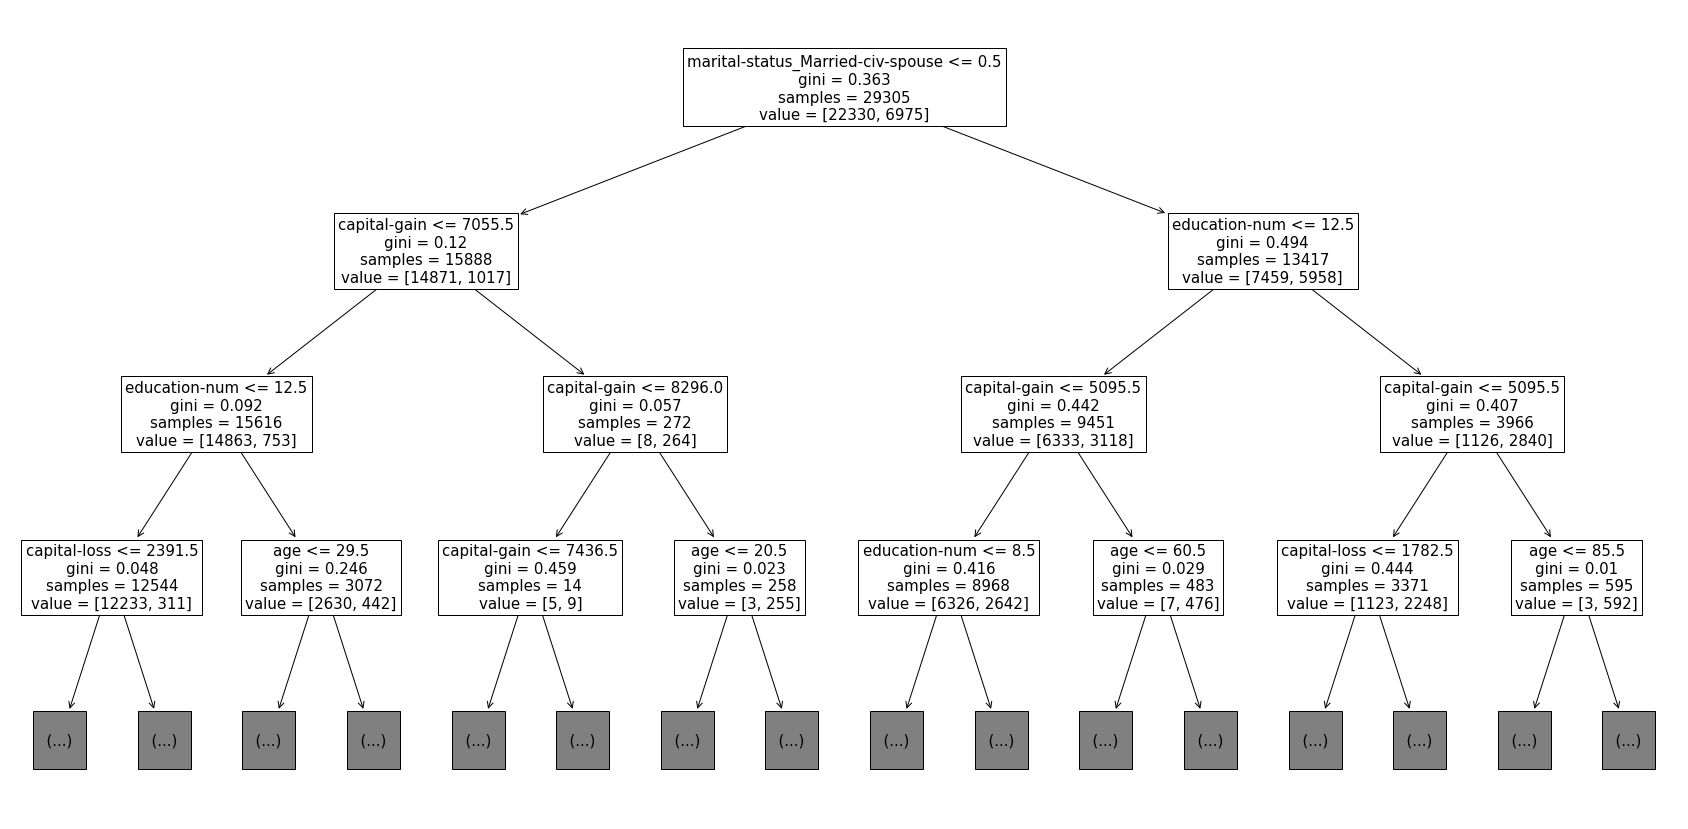

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,15))
plot_tree(model,max_depth=3,fontsize=15,feature_names=X_train.columns)
plt.show()

# Random Forest



*   오버피팅 문제로 결정 트리 사용 어려울 때 사용
*   classification, regression 모두 가능



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/car.csv'
data=pd.read_csv(file_url)
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [ ]:
round(data.describe(),2)

,year,selling_price,km_driven,seats
count,8128.00,8128.00,8128.00,7907.00
mean,2013.80,638271.81,69819.51,5.42
std,4.04,806253.40,56550.55,0.96
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,98000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


outlier가 보이지만 트리 모델이므로 별도로 처리하지 않는다.

## 전처리

- 문자형 데이터를 숫자형으로 바꾼다.
- 불필요한 텍스트를 버릴 것

### object 데이터 처리

In [ ]:
#series object->문자열 데이터
data[['engine','engine_unit']]=data['engine'].str.split(expand=True)
# 분류 결과를 리스트로 묶는다.
data['engine'].head()

0    1248
1    1498
2    1497
3    1396
4    1298
Name: engine, dtype: object

아직 object형이니 타입을 숫자형으로 바꿔준다.

**engine 변수 전처리**

In [ ]:
data['engine']=data['engine'].astype('float32')

In [ ]:
data.drop('engine_unit',axis=1,inplace=True)

**max_power 전처리**

In [ ]:
#series object->문자열 데이터
data[['max_power','max_power_unit']]=data['max_power'].str.split(expand=True)

In [ ]:
#data['max_power']=data['max_power'].astype('float32')
#위 코드는 ValueError: could not convert string to float: 'bhp'

In [ ]:
data[data['max_power']=='bhp']
#이는 원래 데이터에 숫자가없고 bhp만 있어서 max_power로 빠진거

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_power_unit
4933,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796.0,bhp,NaN,8.0,None


In [ ]:
#예외처리문 만들어서 처리
def float_check(value):
    try:
      num=float(value)
      return num
    except ValueError:
      return np.NaN

In [ ]:
data['max_power']=data['max_power'].apply(float_check)

In [ ]:
data.drop('max_power_unit',axis=1,inplace=True)

**mileage 변수 전처리**

In [ ]:
#series object->문자열 데이터
data[['mileage','mileage_unit']]=data['mileage'].str.split(expand=True)
data['mileage']=data['mileage'].astype('float32')

In [ ]:
data['mileage_unit'].unique()

array(['kmpl', 'km/kg', nan], dtype=object)

연료 종류의 차이로 인해서 단위가 다름


*   petrol : 리터당 80.43달라
*   diesel : 리터당 73.56달라
*   LPG : 킬로그램당 40.85달라
*   CNG : 킬로그램당 44.23달라



In [ ]:
# 달러당 주행거리 계산
def mile(x):
    if x['fuel']=='Petrol':
        return x['mileage']/80.43
    elif x['fuel']=='Diesel':
        return x['mileage']/73.56
    elif x['fuel']=='LPG':
        return x['mileage']/40.85
    else:
        return x['mileage']/44.23

In [ ]:
data['mileage']=data.apply(mile,axis=1)
data.drop('mileage_unit',axis=1,inplace=True)

**torque 변수 전처리**

In [ ]:
data['torque']=data['torque'].str.lower()

In [ ]:
def torque_unit(x):
    if 'nm' in str(x):
        return 'Nm'
    elif 'kgm' in str(x):
        return 'kgm'

In [ ]:
data['torque_unit']=data['torque'].apply(torque_unit)

In [ ]:
data[data['torque_unit'].isna()]['torque'].unique()

array([nan, '250@ 1250-5000rpm', '510@ 1600-2400', '110(11.2)@ 4800',
       '210 / 1900'], dtype=object)

nm,kgm이 없거나 null값, nm은 거의다 100단위니까 모두 Nm에 해당한다고 추론

In [ ]:
data['torque_unit'].fillna('Nm',inplace=True)

In [ ]:
data['torque'].head(5)

0              190nm@ 2000rpm
1         250nm@ 1500-2500rpm
2       12.7@ 2,700(kgm@ rpm)
3    22.4 kgm at 1750-2750rpm
4       11.5@ 4,500(kgm@ rpm)
Name: torque, dtype: object

0123456789. 에 해당되지 않으면 split

In [ ]:
def split_num(x):
    x=str(x)
    for i,j in enumerate(x):
        if j not in '0123456789.':
            cut=i
            break
    return x[:cut]

In [ ]:
data['torque']=data['torque'].apply(split_num)

In [ ]:
data['torque']=data['torque'].replace('',np.NaN) #ValueError 피하기 위해 ''를 결측치로 대체
data['torque']=data['torque'].astype('float64')

단위의 일치를 위해 kgm도 nm으로 통일하자

In [ ]:
def torque_trans(x):
    if x['torque_unit']=='kgm':
        return x['torque']*9.8
    else:
        return x['torque']

In [ ]:
data['torque']=data.apply(torque_trans,axis=1)
data.drop('torque_unit',axis=1,inplace=True)

In [ ]:
data.head()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.287384,1498.0,103.52,250.000,5.0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.220067,1497.0,78.00,1219.708,5.0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.312670,1396.0,90.00,2151.296,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.200174,1298.0,88.20,1104.460,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0


**name 변수 전처리**
- name(브랜드명)도 가격을 결정하는 요인

In [ ]:
data['name']=data['name'].str.split(expand=True)[0]
# 가장 첫번째 컬럼만 인덱싱
data['name'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [ ]:
data.isna().mean()
data.dropna(inplace=True)

In [ ]:
data.info()
#name, fuel,seller_type,transmission,owner

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7906 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   fuel           7906 non-null   object 
 5   seller_type    7906 non-null   object 
 6   transmission   7906 non-null   object 
 7   owner          7906 non-null   object 
 8   mileage        7906 non-null   float64
 9   engine         7906 non-null   float32
 10  max_power      7906 non-null   float64
 11  torque         7906 non-null   float64
 12  seats          7906 non-null   float64
dtypes: float32(1), float64(4), int64(3), object(5)
memory usage: 833.8+ KB


In [ ]:
# 남은 텍스트 컬럼들을 더미 변수로 변환
data=pd.get_dummies(data,columns=['name','fuel','seller_type','transmission','owner'],drop_first=True)

## 모델링 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('selling_price',axis=1),data['selling_price'],test_size=0.2,random_state=100)

연속형 변수가 타깃이므로 `randomforestregressor`

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=100)
model.fit(X_train,y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

종속변수가 연속형 데이터이니, 실젯값과 예측값의 차이를 합하는 RMSE를 통해 평가

- 통계적인 방법으로 평가하기(**RMSE**)
    - 실제값과 예측값 사이의 오차를 제곱한 뒤 평균 계산한 것을 루트
    - 값이 작을수록 오차가 작은 거
    - 상대 평가에 사용되기 때문에 RMSE가 가장 낮은 모델 택하면 됨



In [ ]:
from sklearn.metrics import mean_squared_error
print("train model rmse",mean_squared_error(y_train,train_pred)**0.5,"test model rmse",mean_squared_error(y_test,test_pred)**0.5)

train model rmse 53469.554200431725 test model rmse 132633.98163411117


**K-fold cross-validation** 사용

In [ ]:
from sklearn.model_selection import KFold
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.287384,1498.0,103.52,250.000,5.0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.220067,1497.0,78.00,1219.708,5.0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.312670,1396.0,90.00,2151.296,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.200174,1298.0,88.20,1104.460,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,0.230014,1197.0,82.85,113.700,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
8124,2007,135000,119000,0.228385,1493.0,110.00,2304.960,5.0,0,0,...,1,0,0,1,0,1,1,0,0,0
8125,2009,382000,120000,0.262371,1248.0,73.90,190.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
8126,2013,290000,25000,0.320419,1396.0,70.00,140.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0


인덱스는 8127까지 있지만 실제는 7906 rows

kfold는 인덱스를 활용하기 때문에 error가 발생할 수 있으므로 reset_index를 통해 인덱스를 정리해준다.

In [ ]:
data.reset_index(drop=True,inplace=True)
data

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,450000,145500,0.318108,1248.0,74.00,190.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,370000,120000,0.287384,1498.0,103.52,250.000,5.0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,158000,140000,0.220067,1497.0,78.00,1219.708,5.0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,225000,127000,0.312670,1396.0,90.00,2151.296,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,130000,120000,0.200174,1298.0,88.20,1104.460,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,320000,110000,0.230014,1197.0,82.85,113.700,5.0,0,0,...,0,0,1,1,0,1,0,0,0,0
7902,2007,135000,119000,0.228385,1493.0,110.00,2304.960,5.0,0,0,...,1,0,0,1,0,1,1,0,0,0
7903,2009,382000,120000,0.262371,1248.0,73.90,190.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0
7904,2013,290000,25000,0.320419,1396.0,70.00,140.000,5.0,0,0,...,1,0,0,1,0,1,0,0,0,0


In [ ]:
kf=KFold(n_splits=5)
X=data.drop('selling_price',axis=1)
y=data['selling_price']

In [ ]:
X

,year,km_driven,mileage,engine,max_power,torque,seats,name_Ashok,name_Audi,name_BMW,...,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2014,145500,0.318108,1248.0,74.00,190.000,5.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1,2014,120000,0.287384,1498.0,103.52,250.000,5.0,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2,2006,140000,0.220067,1497.0,78.00,1219.708,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,1
3,2010,127000,0.312670,1396.0,90.00,2151.296,5.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
4,2007,120000,0.200174,1298.0,88.20,1104.460,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,2013,110000,0.230014,1197.0,82.85,113.700,5.0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
7902,2007,119000,0.228385,1493.0,110.00,2304.960,5.0,0,0,0,...,1,0,0,1,0,1,1,0,0,0
7903,2009,120000,0.262371,1248.0,73.90,190.000,5.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
7904,2013,25000,0.320419,1396.0,70.00,140.000,5.0,0,0,0,...,1,0,0,1,0,1,0,0,0,0


kfold n_split=5니까 7906을 5로 나누면 약 1317개씩 test dataset, 
그 후 나머지가 train dataset으로 배정

In [ ]:
for i,j in kf.split(X):
    print(i,j)

[1318 1319 1320 ... 7903 7904 7905] [   0    1    2 ... 1315 1316 1317]
[   0    1    2 ... 7903 7904 7905] [1318 1319 1320 ... 2633 2634 2635]
[   0    1    2 ... 7903 7904 7905] [2636 2637 2638 ... 3951 3952 3953]
[   0    1    2 ... 7903 7904 7905] [3954 3955 3956 ... 5269 5270 5271]
[   0    1    2 ... 7903 7904 7905] [5272 5273 5274 ... 6586 6587 6588]
[   0    1    2 ... 6586 6587 6588] [6589 6590 6591 ... 7903 7904 7905]


In [ ]:
train_rmse_total=[]
test_rmse_total=[]
for train_index,test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    # 모델 객체 생성
    model=RandomForestRegressor(random_state=100)
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse_total.append(mean_squared_error(y_train,train_pred)**0.5)
    test_rmse_total.append(mean_squared_error(y_test,test_pred)**0.5)

In [ ]:
for x,y in zip(train_rmse_total,test_rmse_total):
  print(x,y)

51069.7350243753 161758.6065403304
59512.7628769961 134001.82511021724
57142.71449058063 126278.00428655837
56126.31207935527 154817.62645703278
60654.37761908988 142006.1607062795


교차검증 사용한 결과가 좀 더 정확한 결과이다.

In [ ]:
print("train_rmse: ",sum(train_rmse_total)//5,"\ntest_rmse: ",sum(test_rmse_total)//5)

train_rmse:  56901.0 
test_rmse:  143772.0


### Hyperparameter 튜닝

In [ ]:
train_rmse_total=[]
test_rmse_total=[]
for train_index,test_index in kf.split(X):
    X_train,X_test=X.loc[train_index],X.loc[test_index]
    y_train,y_test=y[train_index],y[test_index]
    # 모델 객체 생성
    model=RandomForestRegressor(n_estimators=300,max_depth=60,min_samples_split=5,random_state=100)
    model.fit(X_train,y_train)
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    train_rmse_total.append(mean_squared_error(y_train,train_pred)**0.5)
    test_rmse_total.append(mean_squared_error(y_test,test_pred)**0.5)

In [ ]:
print("train_rmse: ",sum(train_rmse_total)//5,"\ntest_rmse: ",sum(test_rmse_total)//5)

train_rmse:  66712.0 
test_rmse:  143954.0


test_rmse가 낮아져 오버피팅이 줄어드니 새로운 데이터 예측하기엔 이전보다 좋은 모델

# XGBoost

스피드데이팅 데이터셋을 이용하여 커플 성사 여부 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_url='https://media.githubusercontent.com/media/musthave-ML10/data_source/main/dating.csv'
data=pd.read_csv(file_url)

In [2]:
pd.options.display.max_columns=40 # 총 40개 컬럼까지 출력되도록 설정

In [ ]:
data.head(20)



*   `pref_o_xxx` : 상대방이 xxx항목을 얼마나 중요하게 생각하는지
*   `xxx_o` : 상대방이 본인에 대한 xxx항목 평가
*   `xxx_important` : xxx항목에 대해 본인이 얼마나 중요하게 생각하는지
*   `xxx_partner` : 본인이 상대방에 대한 xxx항목 평가


In [ ]:
data.info()

In [5]:
round(data.describe(),2)

,has_null,age,age_o,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sincere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,like,guess_prob_liked,met,match
count,8378.00,8283.00,8274.00,8299.00,8299.00,8289.00,8289.00,8289.00,8280.00,8271.00,8249.00,8166.00,8091.00,8072.00,8018.00,7656.00,7302.00,8299.00,8299.00,8299.00,8289.00,8279.00,8257.00,8176.00,8101.00,8082.00,8028.00,7666.00,7311.00,8220.00,8277.00,1800.00,8138.00,8069.00,8003.00,8378.00
mean,0.87,26.36,26.36,3.78,3.65,22.50,17.40,20.27,17.46,10.69,11.85,6.19,7.18,7.37,6.40,6.78,5.47,22.51,17.40,20.27,17.46,10.68,11.85,6.19,7.18,7.37,6.40,6.78,5.47,0.20,5.53,5.57,6.13,5.21,0.05,0.16
std,0.33,3.57,3.56,2.85,2.81,12.57,7.04,6.78,6.09,6.13,6.36,1.95,1.74,1.55,1.95,1.79,2.16,12.59,7.05,6.78,6.09,6.12,6.36,1.95,1.74,1.55,1.95,1.79,2.16,0.30,1.73,4.76,1.84,2.13,0.28,0.37
min,0.00,18.00,18.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.83,1.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,24.00,24.00,1.00,1.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,15.00,15.00,17.39,15.00,5.00,9.52,5.00,6.00,6.00,5.00,6.00,4.00,-0.02,5.00,2.00,5.00,4.00,0.00,0.00
50%,1.00,26.00,26.00,3.00,3.00,20.00,18.37,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,20.00,18.18,20.00,18.00,10.00,10.64,6.00,7.00,7.00,7.00,7.00,6.00,0.21,6.00,4.00,6.00,5.00,0.00,0.00
75%,1.00,28.00,28.00,6.00,6.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,25.00,20.00,23.81,20.00,15.00,16.00,8.00,8.00,8.00,8.00,8.00,7.00,0.43,7.00,8.00,7.00,7.00,0.00,0.00
max,1.00,55.00,55.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.50,10.00,10.00,11.00,10.00,10.00,100.00,60.00,50.00,50.00,53.00,30.00,10.00,10.00,10.00,10.00,10.00,10.00,0.91,10.00,20.00,10.00,10.00,8.00,1.00


match의 평균이 0.16, 매칭된 경우가 약 16퍼센트 정도

## 전처리

- `중요도 * 점수`로 계산을 추후에 하기 때문에 평가 점수에 관한 변수는 결측치 제거

In [ ]:
data.isna().mean()

In [7]:
data=data.dropna(subset=['pref_o_attractive','pref_o_sincere','pref_o_intelligence','pref_o_funny','pref_o_ambitious','pref_o_shared_interests','attractive_important','sincere_important','intellicence_important','funny_important','ambtition_important','shared_interests_important'])

In [8]:
data=data.fillna(-99)

**나이 차이**를 구해보자

남자가 연상인 경우 +, 반대는 -

In [9]:
def age_gap(x):
    if x['age']==-99:
        return -99
    elif x['age_o']==-99:
        return -99
    elif x['gender']=='female':
        return x['age_o']-x['age']
    else:
        return x['age']-x['age_o']

In [10]:
data['age_gap']=data.apply(age_gap,axis=1)
data['age_gap_abs']=abs(data['age_gap'])

**인종 데이터** 관련 featuring

In [11]:
# 인종이 같은지 판별
def same_race(x):
    if x['race']==-99:
        return -99
    elif x['race']==-99:
        return -99
    elif x['race']==x['race_o']:
        return 1
    else:
        return -1

In [12]:
data['same_race']=data.apply(same_race,axis=1)

importance_same_race와 결합하여 새 변수를 만든다.

In [13]:
def same_race_point(x):
    if x['same_race']==-99:
        return -99
    else:
        return x['same_race']*x['importance_same_race']
data['same_race_point']=data.apply(same_race_point,axis=1)

**attractive , sincere에 대한 평가/중요도 변수**

imp : importance(중요도)

score : rate(점수)

In [14]:
def rating(data,importance,score):
    if data[importance]==-99:
        return -99
    elif data[score]==-99:
        return -99
    else:
        return data[importance]*data[score]

In [15]:
partner_imp=data.columns[8:14]
partner_rate_me=data.columns[14:20]
my_imp=data.columns[20:26]
my_rate_partner=data.columns[26:32]

평가 점수 * 중요도의 새로운 셀 생성

In [16]:
# 상대방 관련 새 변수 이름
new_label_partner=['attractive_p','sincere_partner_p','intelligence_p','funny_p','ambition_p','shared_interests_p']
# 본인 관련 새 변수 이름
new_label_me=['attractive_m','sincere_partner_m','intelligence_m','funny_m','ambition_m','shared_interests_m']

data 전체에 apply 함수를 활용하여 rating 함수 사용

In [17]:
for i,j,k in zip(new_label_partner,partner_imp,partner_rate_me):
      data[i]=data.apply(lambda x: rating(x,j,k),axis=1)

In [18]:
for i,j,k in zip(new_label_me,my_imp,my_rate_partner):
      data[i]=data.apply(lambda x: rating(x,j,k),axis=1)

In [19]:
data=pd.get_dummies(data,columns=['gender','race','race_o'],drop_first=True)

## 모델링 및 평가

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.drop('match',axis=1),data['match'],test_size=0.2,random_state=100)

In [21]:
import xgboost as xgb

In [26]:
model=xgb.XGBClassifier(n_estimators=500,max_depth=5,random_state=100)
model.fit(X_train,y_train)

XGBClassifier(max_depth=5, n_estimators=500, random_state=100)

In [27]:
pred=model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.8677736777367774

약 86퍼의 정확도는 모델링 없이 모든 경우를 0으로만 예측해도 84퍼기 때문에(위에 `describe`)보면 예측 모델이 없는 것보다 조금 더 나은 수준임

In [30]:
print(confusion_matrix(y_test,pred))

[[1297   68]
 [ 147  114]]


confusion matrix를 통해 1종오류(FP), 2종오류(FN) 탐색

Classification_report를 활용하여 평가 수치 확인

Precision(정밀도) : **`TP/(TP+FP)`**

In [32]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.63      0.44      0.51       261

    accuracy                           0.87      1626
   macro avg       0.76      0.69      0.72      1626
weighted avg       0.85      0.87      0.86      1626



### hyperparameter 튜닝

In [33]:
from sklearn.model_selection import GridSearchCV
parameters={
    'learning_rate':[0.01,0.1,0.3],
    'max_depth':[5,7,10],
    'subsample':[0.5,0.7,1],
    'n_estimators':[300,500,1000]
}

하이퍼파라미터셋이 총 4종류에 3개씩 값이 있으며 `cv=5` 이므로 교차검증 5번, 즉 405번의 모델링 작업이 수행

In [34]:
model=xgb.XGBClassifier()
gs_model=GridSearchCV(model,parameters,n_jobs=-1,scoring='f1',cv=5)
gs_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 7, 10],
                         'n_estimators': [300, 500, 1000],
                         'subsample': [0.5, 0.7, 1]},
             scoring='f1')

**최적의** 하이퍼파라미터 출력


In [35]:
gs_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 1000, 'subsample': 0.5}

In [36]:
pred=gs_model.predict(X_test)
accuracy_score(y_test,pred)

0.8634686346863468

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1365
           1       0.60      0.44      0.51       261

    accuracy                           0.86      1626
   macro avg       0.75      0.69      0.71      1626
weighted avg       0.85      0.86      0.85      1626



### 중요 변수 확인

xgboost 모델은 변수의 중요도까지 계산해준다.

In [41]:
model=xgb.XGBClassifier(learning_rate= 0.3, max_depth= 5, n_estimators= 1000, subsample= 0.5,random_state=100)
model.fit(X_train,y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimators=1000,
              random_state=100, subsample=0.5)

In [43]:
feature_imp=pd.DataFrame({'features':X_train.columns,'values':model.feature_importances_})
feature_imp.head()

,features,values
0,has_null,0.021781
1,age,0.011376
2,age_o,0.009981
3,importance_same_race,0.009848
4,importance_same_religion,0.010608


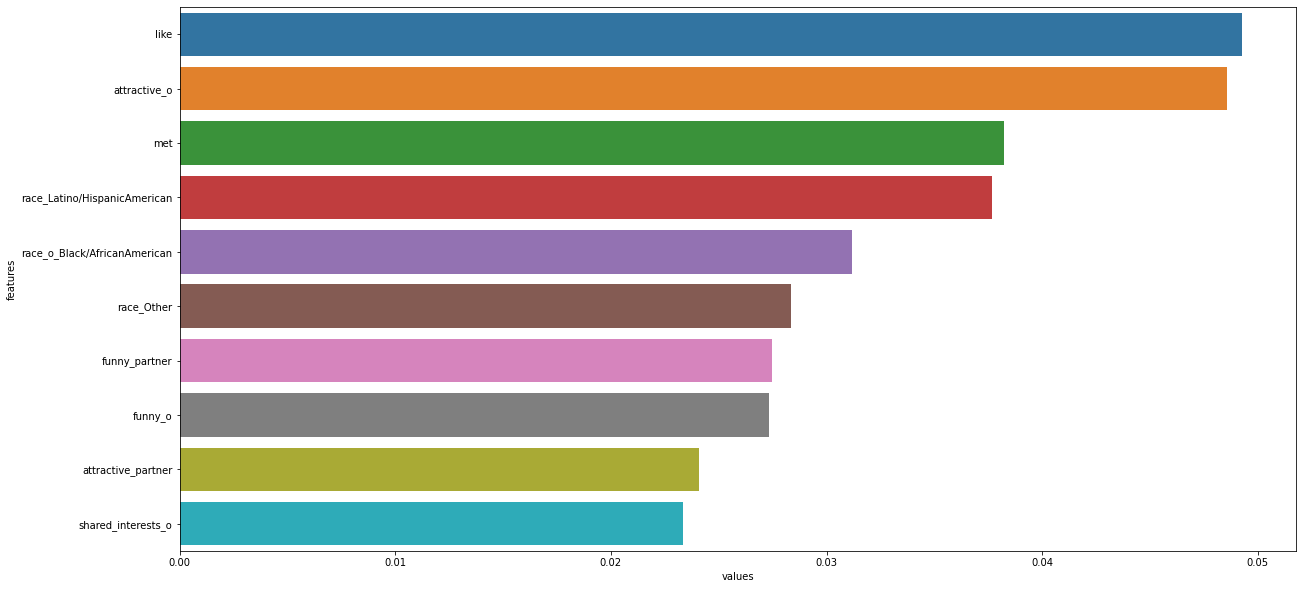

In [44]:
plt.figure(figsize=(20,10))
sns.barplot(x='values',y='features',data=feature_imp.sort_values(by='values',ascending=False).head(10))